## Importing & Loading Libraries/Paths

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\steve\Documents\CF - Instacart Project'

In [4]:
opm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'finaldataset.pkl'))

In [39]:
# Removing the limit on max columns for the head function
pd.set_option('display.max_columns', None)

In [40]:
opm.head(1)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,frequency_flag,gender,state,age,num_dependants,marital_status,income,region,cust_activity,age_group,income_status,department,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423,South,High activity,18-34ys,Low income,beverages,Large family


## Creating a Sample Set:

In [9]:
# Assign a seed to make it easier to reproduce results
np.random.seed(26)
pool = np.random.rand(len(opm)) <= 0.7

In [11]:
# the ~ means use the false values.  In this case the true values are 70% and false are 30% of data
big = opm[pool]
small = opm[~pool]

## Bar Chart w/ Custom Label:

In [5]:
custom_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

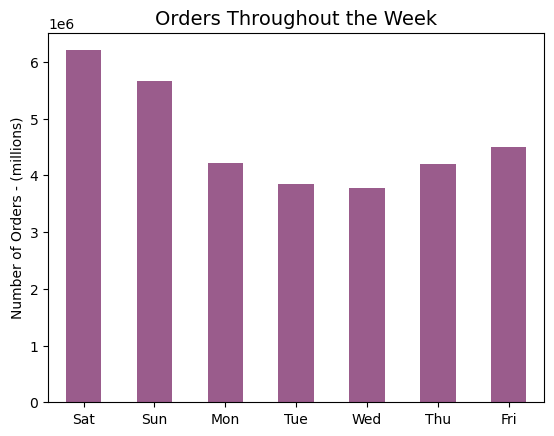

In [6]:
# Coming back end of project to improve this bar chart
bar_ordweek = opm['order_day_of_week'].value_counts().sort_index().plot.bar(color='#9a5c8c')
plt.xticks(range(7), custom_labels, rotation=0)
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders - (millions)", fontsize=10)  
plt.title("Orders Throughout the Week", fontsize=14)
plt.show()

## Historgram:

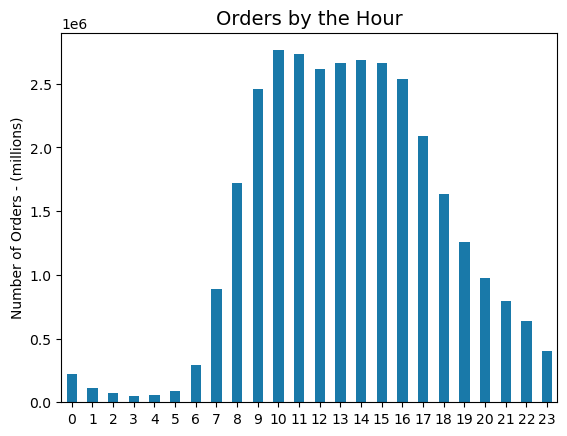

In [27]:
# Creating histogram, using order_hour_of_day
bar_ordhour = opm['order_hour_of_day'].value_counts().sort_index().plot.bar(color='#1979a9')
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders - (millions)", fontsize=10)  
plt.title("Orders by the Hour", fontsize=14)
plt.show()

## Scatterplot:

In [12]:
# You can make the small sample even smaller by creating a subset containing ONLY the categories you need
pricetime = small[['prices', 'order_hour_of_day']]

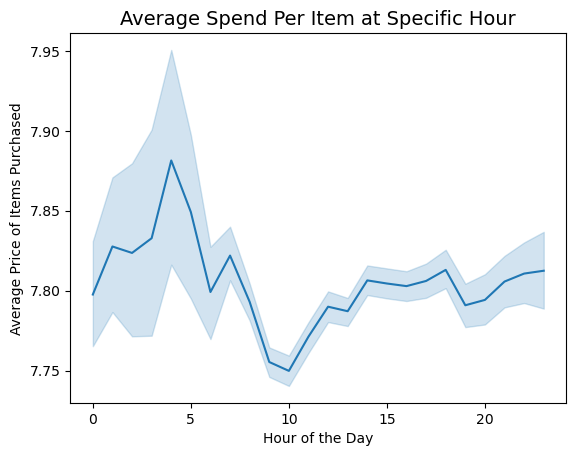

In [19]:
line_price_hour = sns.lineplot(data = pricetime, x = 'order_hour_of_day', y = 'prices')
plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Average Price of Items Purchased", fontsize=10)  
plt.title("Average Spend Per Item at Specific Hour", fontsize=14)
plt.show()

In [22]:
line_price_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_price_hour.png'))

## Line Graph:

In [16]:
# consolidating the chart to only have necessary columns
order_prices = small[['order_day_of_week', 'prices']]

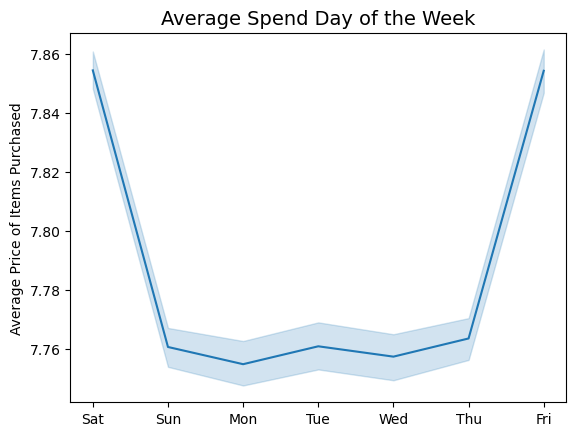

In [20]:
# Note, just by using the custom label, all values are placed on x axis, good to know!
line_avgspend_week = sns.lineplot(data = order_prices, x = 'order_day_of_week', y = 'prices')
plt.xlabel("", fontsize=10)
plt.xticks(range(7), custom_labels, rotation=0)
plt.ylabel("Average Price of Items Purchased", fontsize=10)  
plt.title("Average Spend Day of the Week", fontsize=14)
plt.show()

In [21]:
line_avgspend_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_avgspend_week.png'))

## Further Practices:

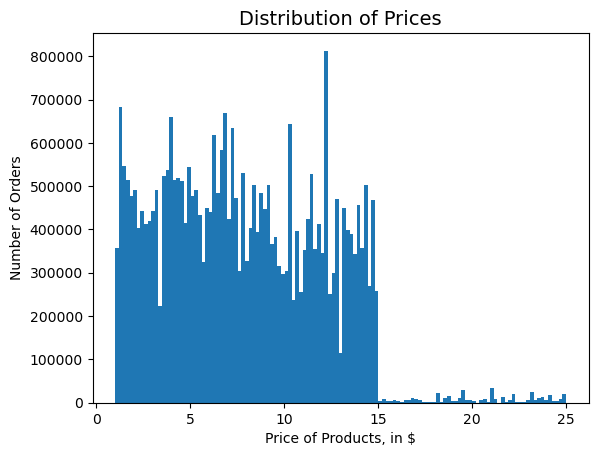

In [34]:
# Histogram for price distributions
hist_price_dist = opm['prices'].plot.hist(bins=125)
plt.xlabel("Price of Products, in $", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders", fontsize=10)  
plt.title("Distribution of Prices", fontsize=14)
plt.show()

In [36]:
hist_price_dist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_price_dist.png'))

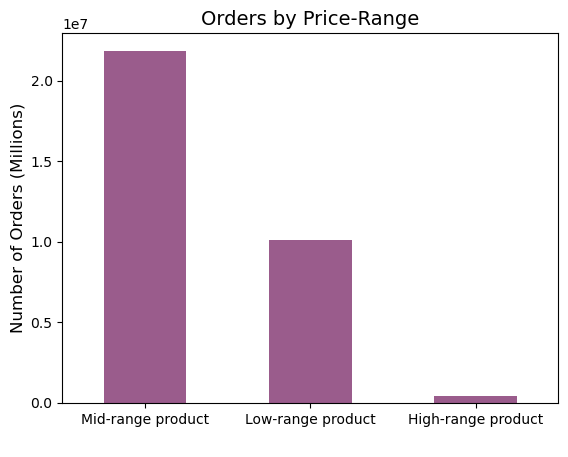

In [44]:
# Bar Graph for Price Groupings
bar_price_group = opm['price_range'].value_counts()
bar_price_group = bar_price_group.plot(kind='bar', color='#9a5c8c')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders (Millions)", fontsize=12)  
plt.title("Orders by Price-Range", fontsize=14)
plt.show()

In [45]:
bar_price_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_price_group.png'))

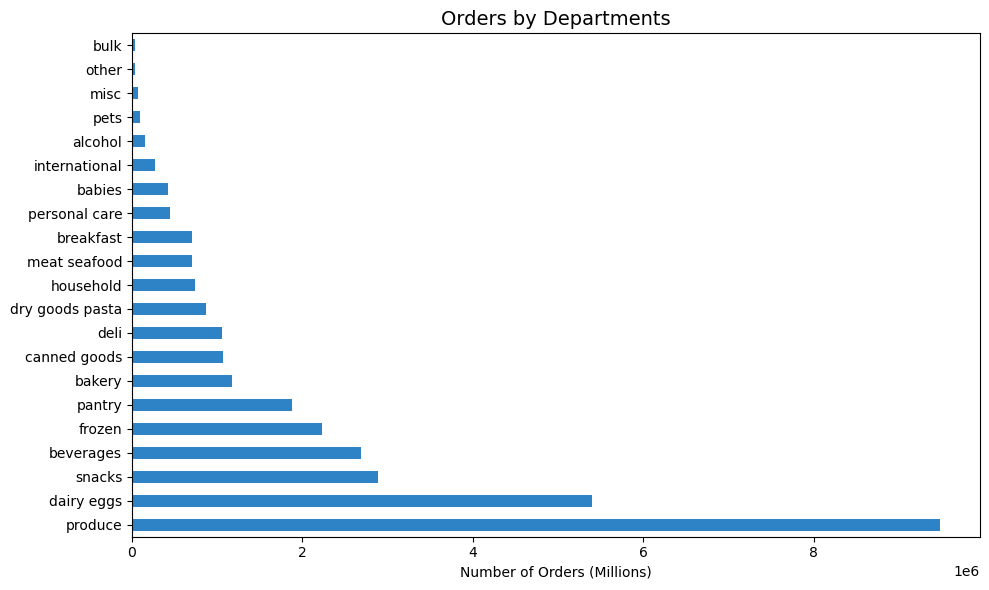

In [48]:
# Creating prods departs but with larger size frame
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed

# Create the horizontal bar chart
bar_dept_freq = opm['department'].value_counts()
bar_dept_freq = bar_dept_freq.plot(kind='barh', color='#2d83c5')

# Customize labels and title
plt.xlabel("Number of Orders (Millions)", fontsize=10)
plt.ylabel("", fontsize=10)  # Provide a label for the y-axis
plt.title("Orders by Departments", fontsize=14)

# Show the plot
plt.tight_layout()  # Ensures labels are not cut off
plt.show()

In [49]:
bar_dept_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_freq.png'))

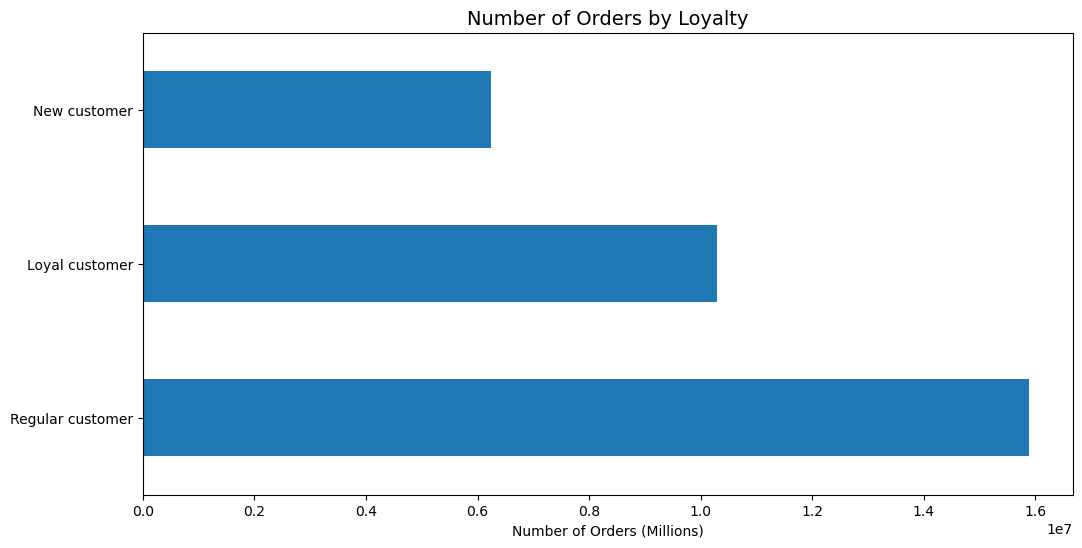

In [55]:
plt.figure(figsize=(12, 6))
bar_loyalty = opm['loyalty_flag'].value_counts()
bar_loyalty = bar_loyalty.plot(kind='barh')
plt.xlabel("Number of Orders (Millions)", fontsize=10)
plt.ylabel("", fontsize=10)  
plt.title("Number of Orders by Loyalty", fontsize=14)
plt.show()

In [56]:
bar_loyalty.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_loyalty.png'))

## Creating Bars based on Unique Counts:

In [61]:
# Creating a low catagory subset in case
loyalty_sub = opm[['user_id', 'loyalty_flag']].groupby('user_id')

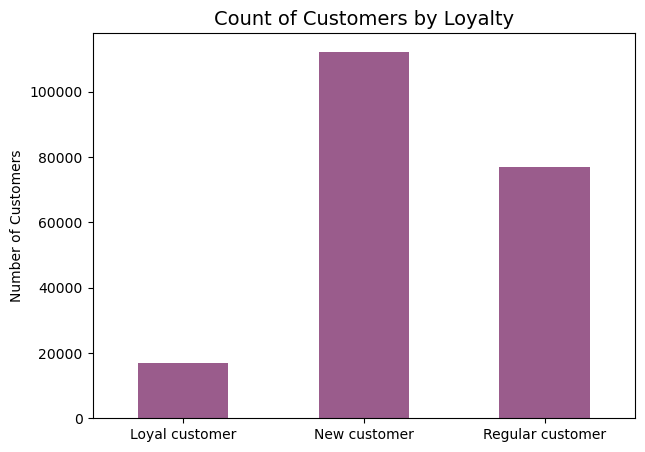

In [80]:
# Group by 'loyalty_flag' and count distinct user IDs
bar_loyalty_counts = opm.groupby('loyalty_flag')['user_id'].nunique()

plt.figure(figsize=(7, 5))

# Create a bar chart
bar_loyalty_counts.plot(kind='bar', color='#9a5c8c')

# Customize labels and title
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Customers", fontsize=10)
plt.title("Count of Customers by Loyalty", fontsize=14)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_counts.png'))

# Show the plot
plt.show()

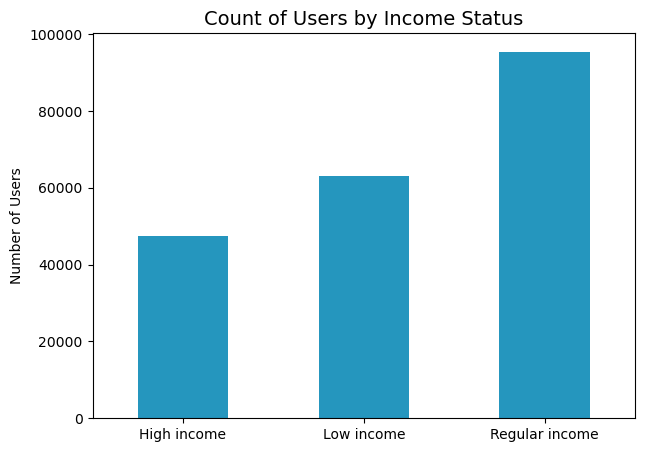

In [6]:
# Setting size due to parts being cut off
plt.figure(figsize=(7, 5))

# Group by 'income_status' and count distinct user IDs
bar_income_counts = opm.groupby('income_status')['user_id'].nunique()

# Create a bar chart
bar_income_counts.plot(kind='bar', color='#2596be')

# Customize labels and title
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Users", fontsize=10)
plt.title("Count of Users by Income Status", fontsize=14)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_counts.png'))

# Show the plot
plt.show()

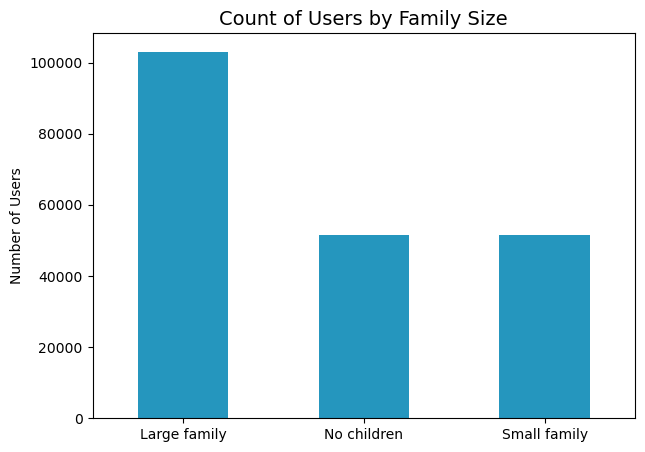

In [7]:
# Setting size due to parts being cut off
plt.figure(figsize=(7, 5))

# Group by 'family_size' and count distinct user IDs
bar_family_counts = opm.groupby('family_size')['user_id'].nunique()

# Create a bar chart
bar_family_counts.plot(kind='bar', color='#2596be')

# Customize labels and title
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Users", fontsize=10)
plt.title("Count of Users by Family Size", fontsize=14)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_counts.png'))

# Show the plot
plt.show()

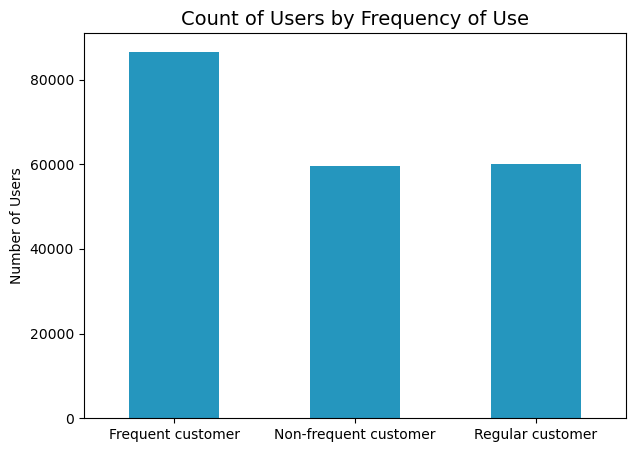

In [12]:
# Setting size due to parts being cut off
plt.figure(figsize=(7, 5))

# Group by 'frequency_flag' and count distinct user IDs
bar_freq_counts = opm.groupby('frequency_flag')['user_id'].nunique()

# Create a bar chart
bar_freq_counts.plot(kind='bar', color='#2596be')

# Customize labels and title
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Users", fontsize=10)
plt.title("Count of Users by Frequency of Use", fontsize=14)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_freq_counts.png'))

# Show the plot
plt.show()

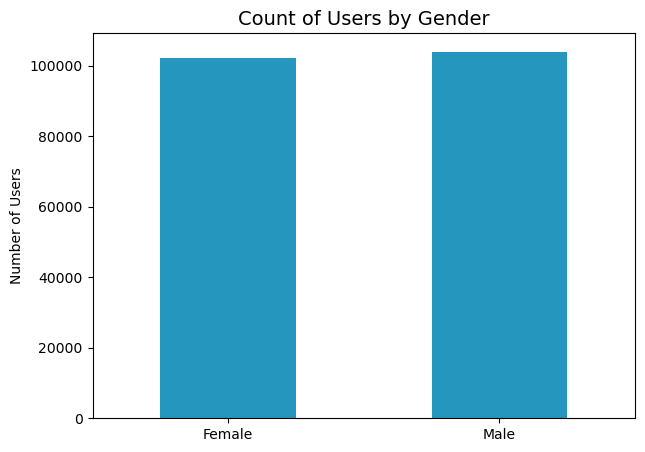

In [15]:
# Setting size due to parts being cut off
plt.figure(figsize=(7, 5))

# Group by 'gender' and count distinct user IDs
bar_gender_counts = opm.groupby('gender')['user_id'].nunique()

# Create a bar chart
bar_gender_counts.plot(kind='bar', color='#2596be')

# Customize labels and title
plt.xlabel("", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Users", fontsize=10)
plt.title("Count of Users by Gender", fontsize=14)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_gender_counts.png'))

# Show the plot
plt.show()